# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
'''
1. Built-in Sobel, Prewill, Roberts
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

<ipython-input-4-7ea45383880d>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('circuit.tif'))


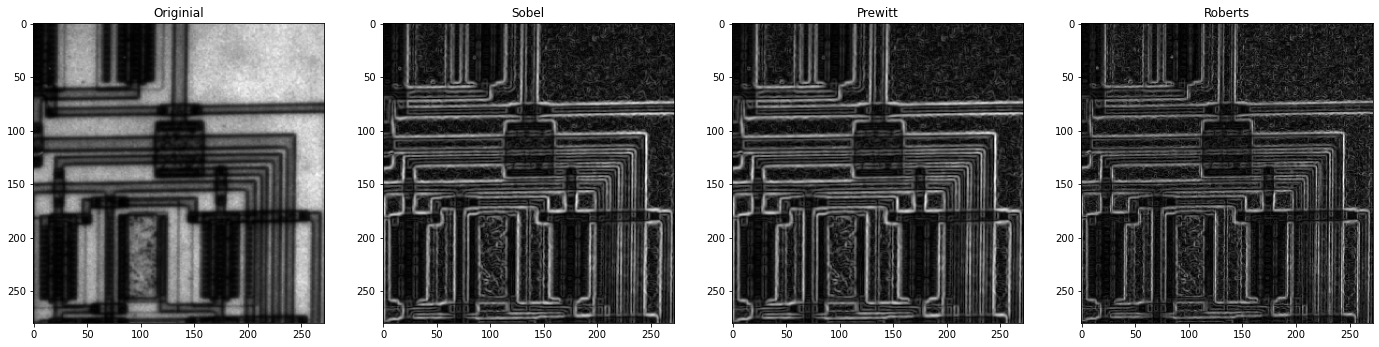

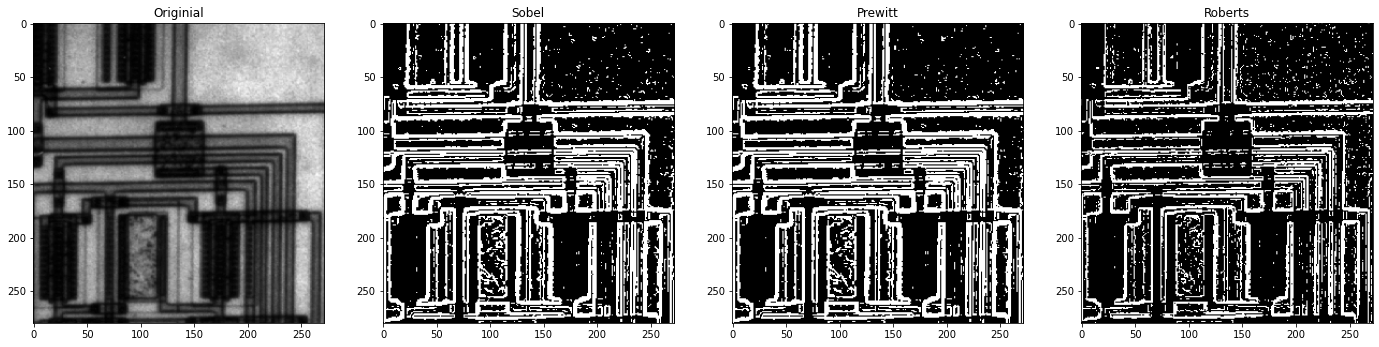

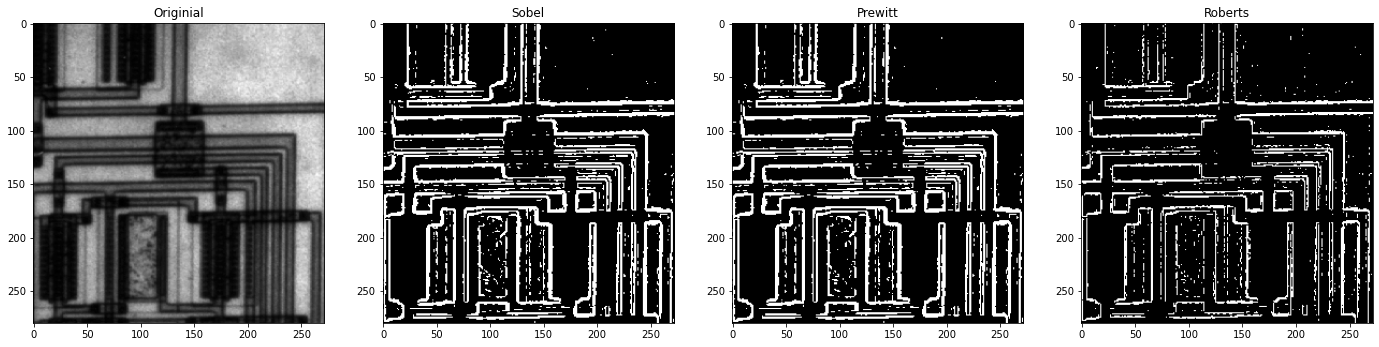

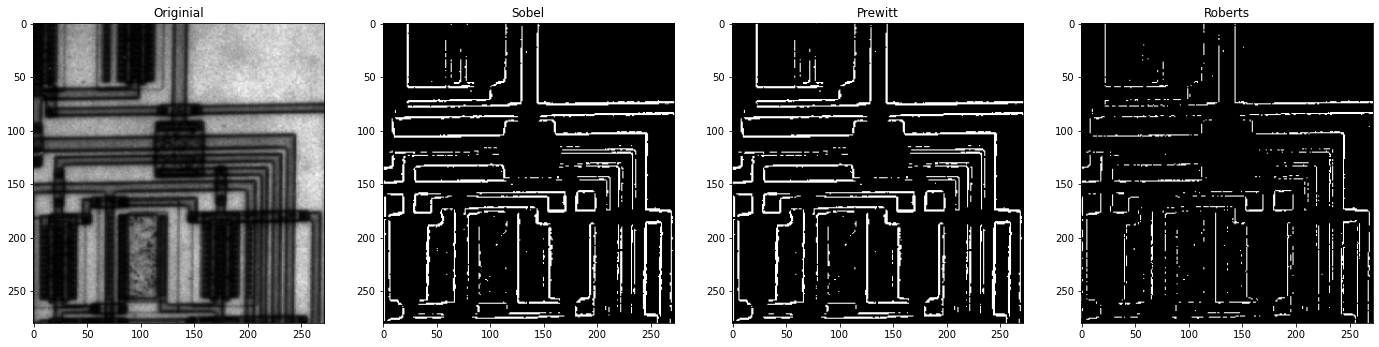

In [4]:
# 1. Built-in Sobel, Prewitt, Roberts

img = rgb2gray(io.imread('circuit.tif'))
show_images([img, sobel(img), prewitt(img), roberts(img)], ["Originial", "Sobel", "Prewitt", "Roberts"])
#Roberts uses a small filter and thus is very susceptible to noise as can be seen.
#The edges from Sobel are stronger than those from Prewitt due to the modified weight.

#Thresholding with 0.05:
show_images([img, sobel(img)>0.05, prewitt(img)>0.05, roberts(img)>0.05], ["Originial", "Sobel", "Prewitt", "Roberts"])
#Thresholding with 0.07:
show_images([img, sobel(img)>0.07, prewitt(img)>0.07, roberts(img)>0.07], ["Originial", "Sobel", "Prewitt", "Roberts"])
#Thresholding with 0.1:
show_images([img, sobel(img)>0.1, prewitt(img)>0.1, roberts(img)>0.1], ["Originial", "Sobel", "Prewitt", "Roberts"])

#Less edges survived as we increased the threshold. 
# Robert was severely affected because it naturally has small magnitudes due to the small kernel

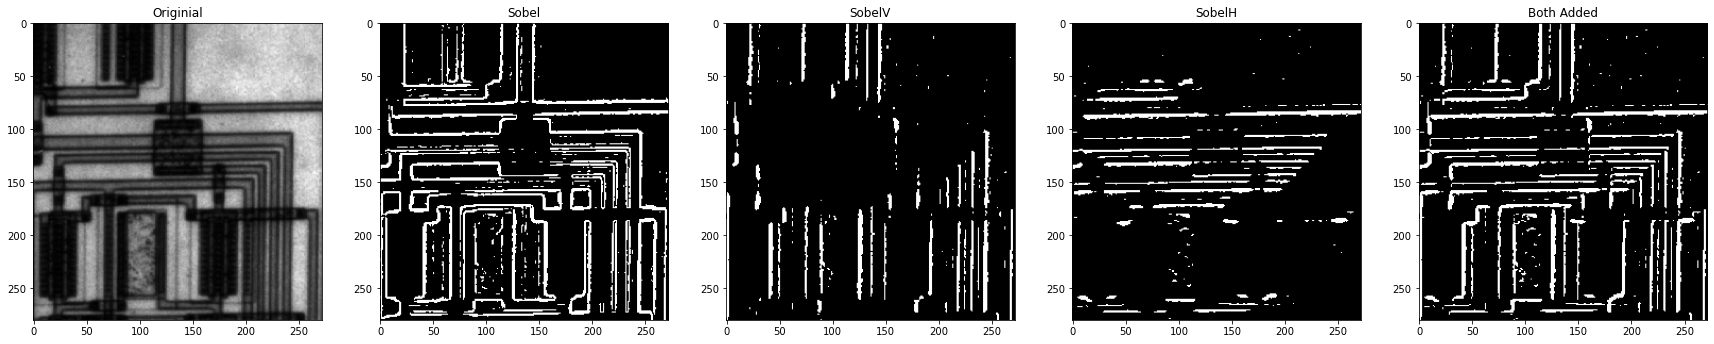

In [5]:
# 2. Custom Sobel (V-H-Both)
img2 = sobel(img, axis=1)
show_images([img, sobel(img)>0.08, sobel(img, axis=1)>0.08, sobel(img, axis=0)>0.08, (sobel(img, axis=1)>0.08) + (sobel(img, axis=0)>0.08) ], ["Originial", "Sobel", "SobelV", "SobelH", "Both Added"])
# Does indeed seperately detect vertical and horizontal edges but with no thresholding.
#The magnitude approximation is not so terrible

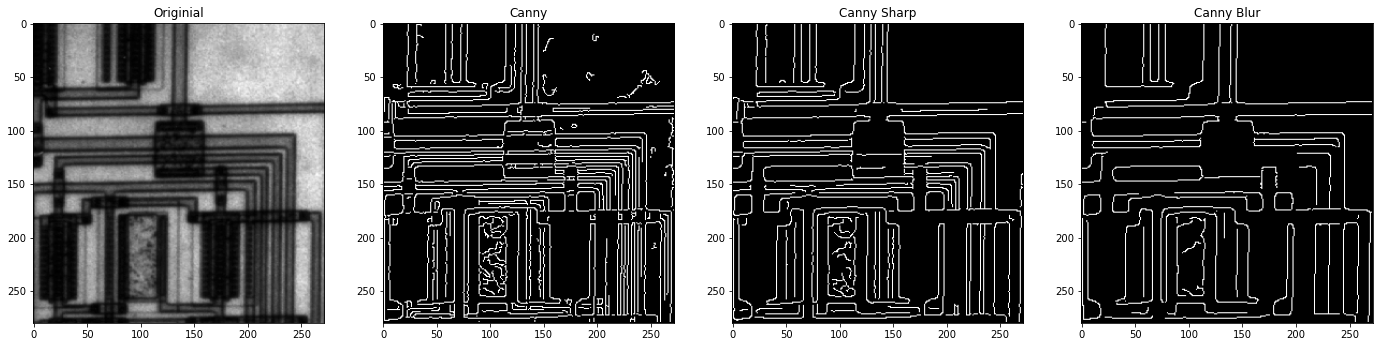

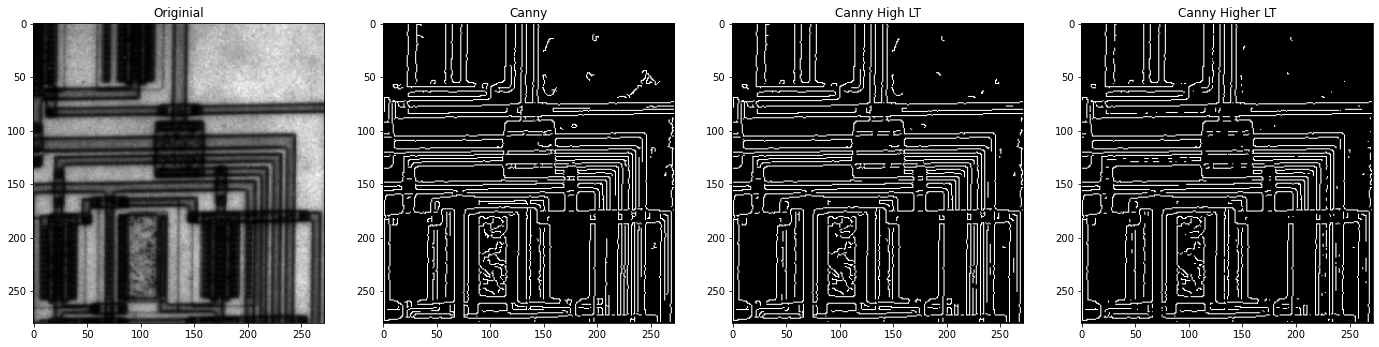

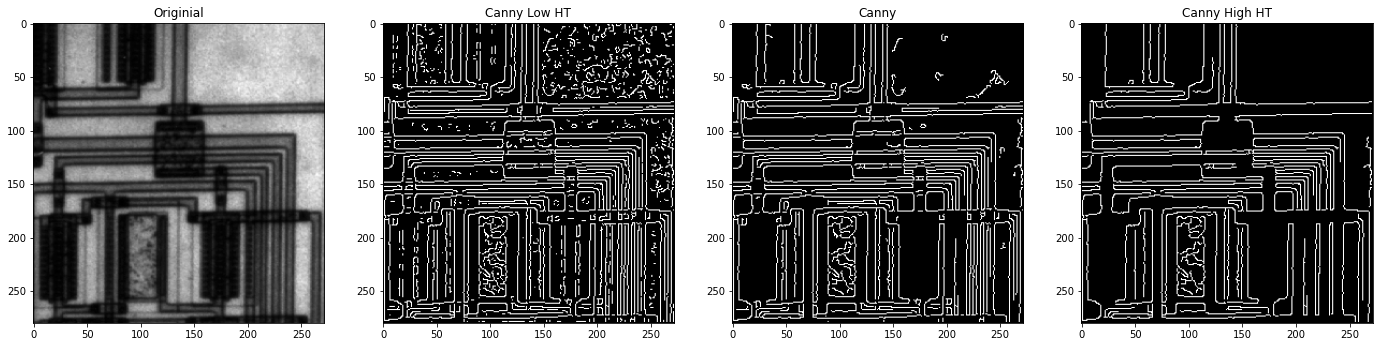

In [6]:
#Canny: 

# Changing Sigma:
show_images([img, canny(img, sigma=1), canny(img, sigma=1.5, ), canny(img, sigma=2)], ["Originial", "Canny", "Canny Sharp", "Canny Blur"])
#As sigma increases, we blur more and lose more weak edges.

# Changing the low threshold:
show_images([img, canny(img,low_threshold=0.1*255), canny(img, low_threshold=0.15*255 ), canny(img, low_threshold=0.2*255)], ["Originial", "Canny", "Canny High LT", "Canny Higher LT"])
#When we slightly increased the low threshold, noise/disconnected edges started to break up further increasing it amplified the effect.

# Changing the high threshold:
show_images([img, canny(img, high_threshold=0.1*255), canny(img, high_threshold=0.2*255 ), canny(img, high_threshold=0.3*255)], ["Originial", "Canny Low HT", "Canny", "Canny High HT"])
#Decreasing the high threshold allowed much noise to survice.
#Increasing the high threshold eliminated more disconnected edges

#It's clear how compared to other techniques Canny has less noise (due to the Guassian filter) and has a single response.

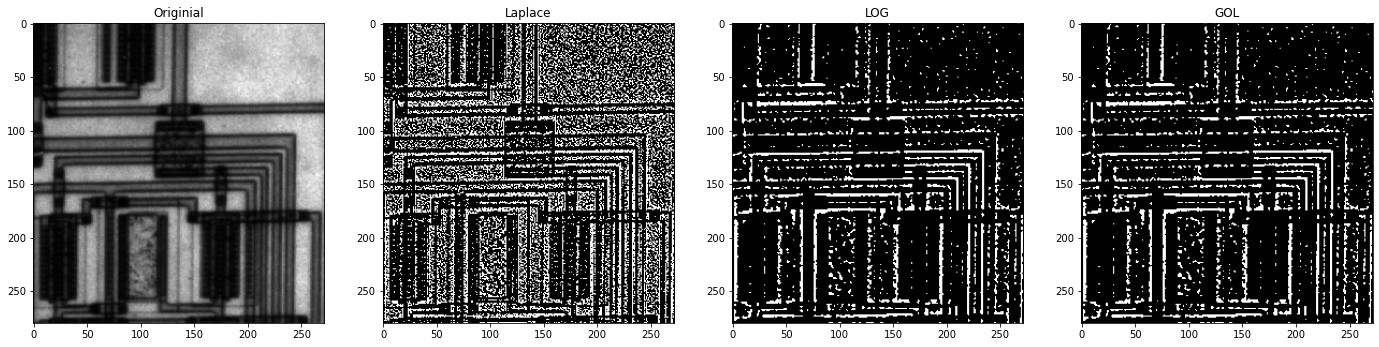

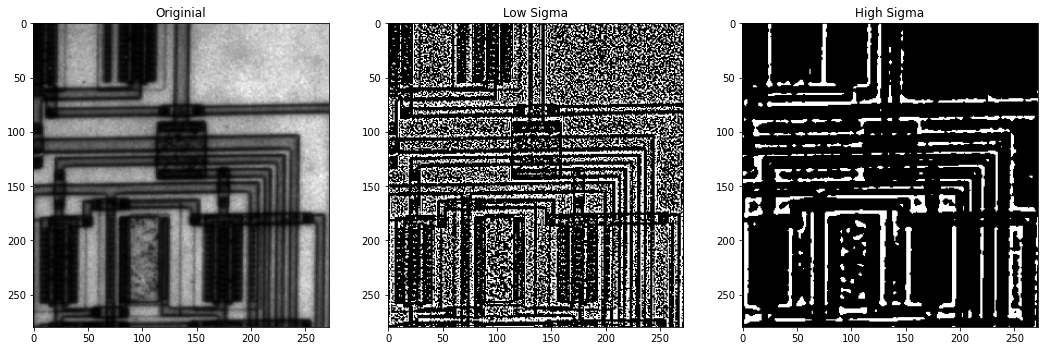

In [7]:
# 3. Custom LoG
from skimage.filters import laplace, gaussian
show_images([img, laplace(img)>0.024, laplace(gaussian(img))>0.024, gaussian(laplace(img))>0.024], ["Originial", "Laplace", "LOG", "GOL"])
show_images([img, laplace(gaussian(img, sigma=0.07))>0.02, laplace(gaussian(img, sigma=2))>0.01], ["Originial", "Low Sigma", "High Sigma"])

#The laplacian filter is susceptible to noise due to relying on the 2nd derivative. 

#Convolution is clearly associative.
#Laplacian is very susceptible to noise without the gaussian filter
#More noise (and weak edges) are filtered as sigma goes up.


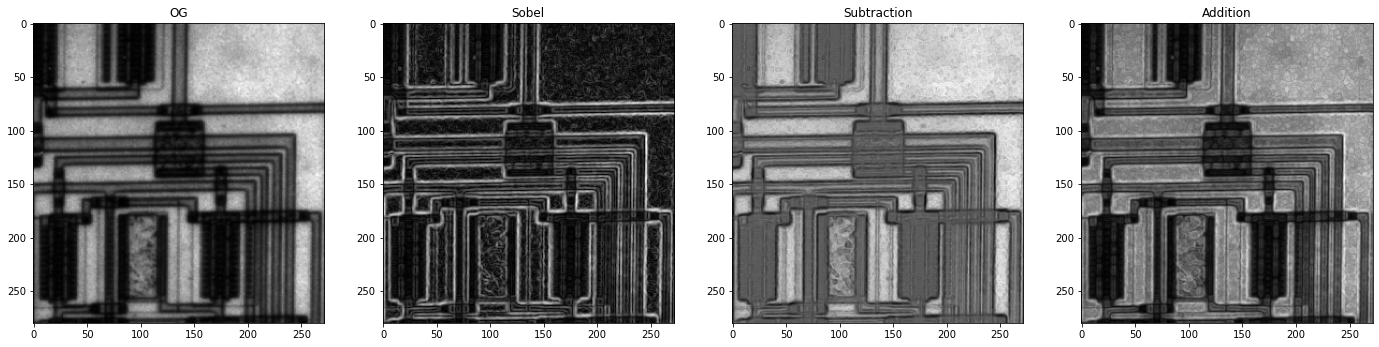

In [8]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

new_img1 = img - 700 * sobel(img)
new_img2 = img + 700 * sobel(img)

show_images([img,sobel(img), new_img1, new_img2], ["OG","Sobel", "Subtraction", "Addition"])
#outlining/de-outlining edges.


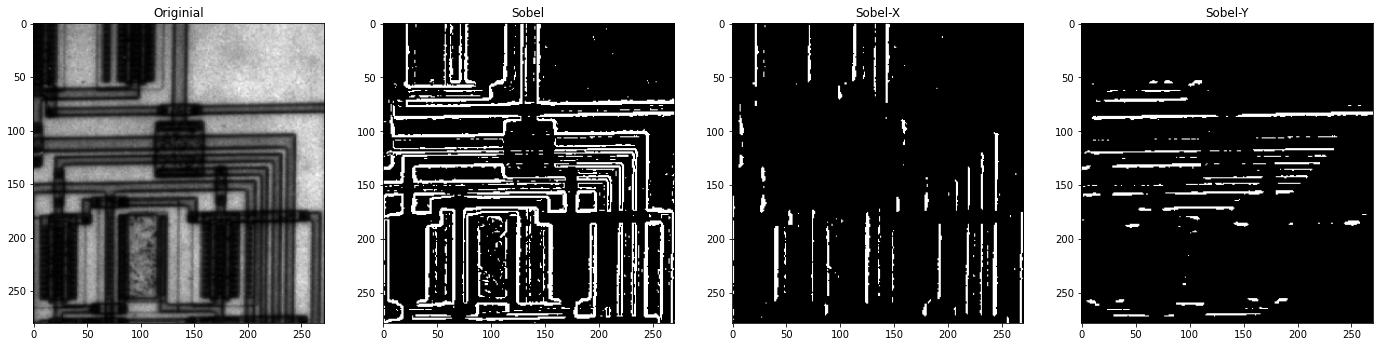

In [67]:
from skimage.transform import resize
#Implementing Sobel:
def convolution_filter(gray_img, kernel):

    kernel_size = len(kernel)
    #dimensions of convolution result (no padding):
    row = gray_img.shape[0] - kernel_size + 1
    col = gray_img.shape[1] - kernel_size + 1

    result = np.zeros(shape=(row, col))

    for i in range(row):
        for j in range(col):
            current = gray_img[i:i+kernel_size, j:j+kernel_size]
            multiplication = sum(sum(current * kernel))           #to sum over the two axes
            result[i, j] = multiplication

    return result

imgx = io.imread('circuit.tif').astype(np.float64)/255
hx = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
      
hy = [[-1, -2, -1],
      [0, 0, 0],
      [1, 2, 1]]

result = np.sqrt(convolution_filter(imgx, hx)**2 + convolution_filter(imgx, hy)**2)
result_x = convolution_filter(imgx, hx)
result_y = convolution_filter(imgx, hy)
show_images([imgx, result>0.4, result_x>0.4, result_y>0.4], ["Originial", "Sobel", "Sobel-X", "Sobel-Y"])

#Indeed, the results do agree with the last time we applied Sobel. Sobel-x shows vertical edges because the gradient is
# orthogonal of the edge.



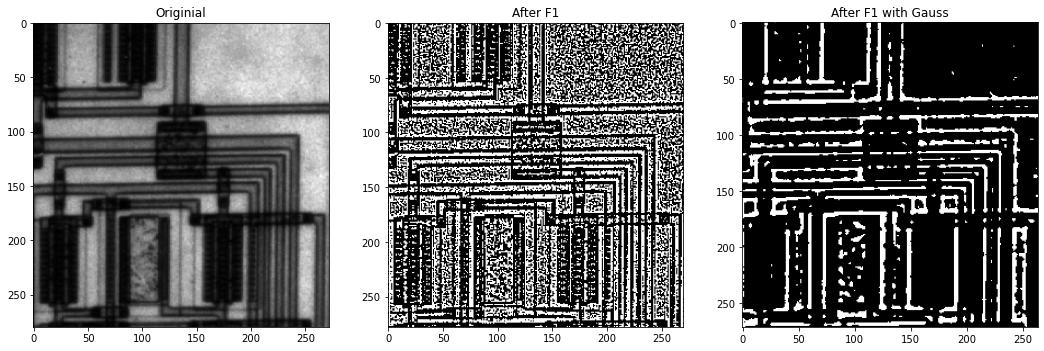

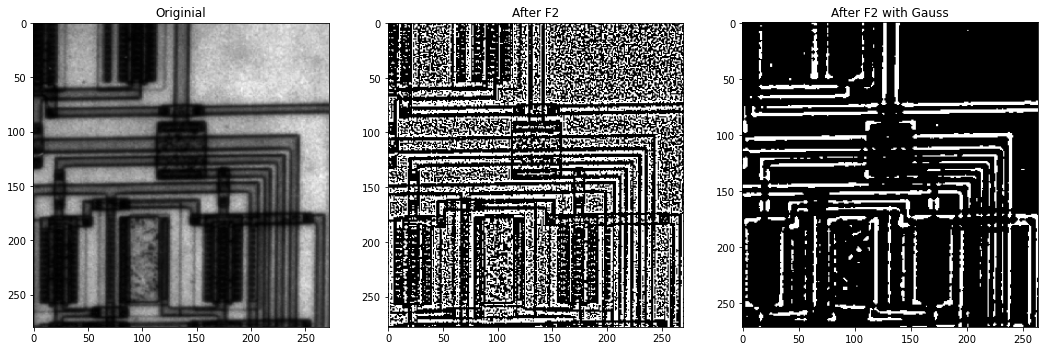

In [56]:
#Gaussian Kernel (Courtsey to Stackoverflow):
from numpy import pi, exp, sqrt
s, k = 1.8, 3                     # generate a (2k+1)x(2k+1) gaussian kernel with mean=0 and sigma = s
probs = [exp(-z*z/(2*s*s))/sqrt(2*pi*s*s) for z in range(-k,k+1)] 
gauss = np.outer(probs, probs) #product of two 1D Gaussian distributions is a 2D one.

img = io.imread('circuit.tif').astype(np.float64)/255
f1 = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
f2 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
gimg = convolution_filter(img, gauss)
show_images([img, convolution_filter(img, f1)>0.031,convolution_filter(gimg, f1)>0.031], ["Originial", "After F1", "After F1 with Gauss"])
show_images([img, convolution_filter(img, f1)>0.031,convolution_filter(gimg, f2)>0.011], ["Originial", "After F2", "After F2 with Gauss"])

#Clearly, we observe far less noise after the Gaussian filter but the edges are no longer as consice.